In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd "/content/drive/MyDrive/2020-CBMS-DoubleU-Net/"

import data as data
from glob import glob
import model as Model
import train as Train
import trainTuning as tT
import predict as Predict
import pathlib
import mask_to_submission as m2s
import pandas as pd
import numpy as np
import predict as Predict
import cv2

Mounted at /content/drive
/content/drive/MyDrive/2020-CBMS-DoubleU-Net


---


## Find best learning rate

In [ ]:
# hyperparameters to tune
epochs = [6]
training_size = [800]
batch_size = [7]
lr = np.linspace(1e-5, 1e-3, num = 5)

for epoch in epochs :
  for Ts in training_size :
    for Bs in batch_size :
      for LR in lr :
        tT.main_train(Ts,Bs,epoch,LR)

path = pathlib.Path('Project2').parent.resolve()
path = str(path)

loss = np.zeros((len(epochs),len(training_size),len(batch_size),len(lr)))
validation_loss = np.zeros((len(epochs),len(training_size),len(batch_size),len(lr)))

for epoch in range(len(epochs)) :
  for Ts in range(len(training_size)) :
    for Bs in range(len(batch_size)) :
      for LR in range(len(lr)) :
        E = epochs[epoch]
        T = training_size[Ts]
        B = batch_size[Bs]
        L = lr[LR]
        model_path = path + "files/dataTuning_TRsize" + str(T) + "batchsize" + str(B) + "epochs" + str(E) + "LR" + str(L) + ".csv"
        history = pd.read_csv(model_path)
        loss[epoch,Ts,Bs,LR] = history['loss']
        validation_loss[epoch,Ts,Bs,LR] = history['val_loss']

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/6
115/115 [==============================] - 608s 5s/step - loss: 0.6971 - dice_coef: 0.3029 - iou: 0.1789 - recall_2: 0.7260 - precision_2: 0.3066 - val_loss: 0.7323 - val_dice_coef: 0.2677 - val_iou: 0.1549 - val_recall_2: 0.5238 - val_precision_2: 0.3040 - lr: 1.0000e-05
Epoch 2/6
115/115 [==============================] - 594s 5s/step - loss: 0.6497 - dice_coef: 0.3503 - iou: 0.2131 - recall_2: 0.7548 - precision_2: 0.3577 - val_loss: 0.7050 - val_dice_coef: 0.2950 - val_iou: 0.1734 - val_recall_2: 0.7374 - val_precision_2: 0.3165 - lr: 1.0000e-05
Epoch 3/6
115/115 [==============================] - 595s 5s/step - loss: 0.5641 - dice_coef: 0.4359 - iou: 0.2797 - recall_2: 0.8163 - precision_2: 0.5026 - val_loss: 0.6724 - val_dice_coef: 0.3276 - val_iou: 0.1964 - val_recall_2: 0.5939 - val_precision_2: 0.3832 - lr: 1.0000e-05
Epoch 4/6
115/115 [==============================] - 596s 5s/step - loss: 0.5153 - dice_coef: 0.4847 - iou: 0.3209 - recall_2: 0.8423 - precision_2: 0.

FileNotFoundError: ignored

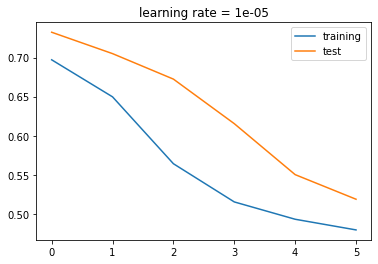

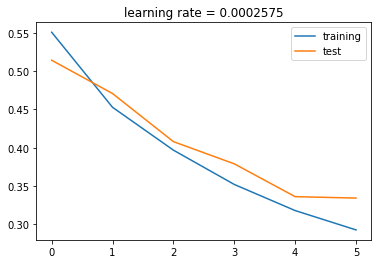

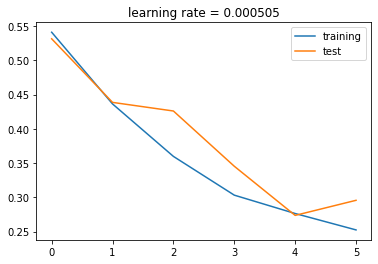

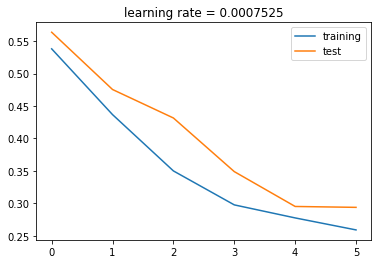

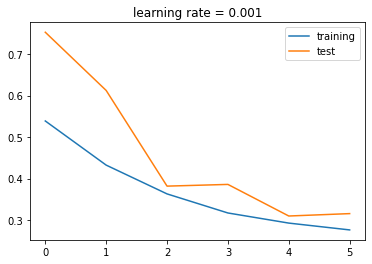

In [ ]:
import matplotlib.pyplot as plt 
lr = np.linspace(1e-5, 1e-3, num = 5)
path = pathlib.Path('Project2').parent.resolve()
path = str(path)

for LR in range(len(lr)) :
  L = lr[LR]
  data_path = path + "/files/dataTuning_TRsize" + str(800) + "batchsize" + str(7) + "epochs" + str(6) + "LR" + str(L) + ".csv"
  history = pd.read_csv(data_path)
  loss = history['loss']
  validation_loss= history['val_loss']
  fig = plt.figure()
  plt.plot(loss, label = 'training')
  plt.plot(validation_loss, label = 'test')
  plt.title('learning rate = ' + str(L))
  plt.legend()
